In [1]:
!pip install make-spirals

# k-Nearest Neighbors Classifier

El algoritmo de los **k vecinos más cercanos (kNN)** se puede utilizar como modelo de clasificación.

Su funcionamiento es muy intuitivo y análogo a su homónimo *kNN* existente para regresión. Para clasificar un punto cualquiera el algoritmo:

1. Calcula la distancia existente entre dicho punto y todos los demás puntos existentes en el conjunto de datos.
2. Determina los *k* puntos más cercanos.
3. Determina la clase de un punto en función de la clase a la que pertenezcan dichos puntos.

Analicemos el funcionamiento de **KNN** como modelo de clasificación usando el siguiente conjunto de datos:

In [2]:
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_moons

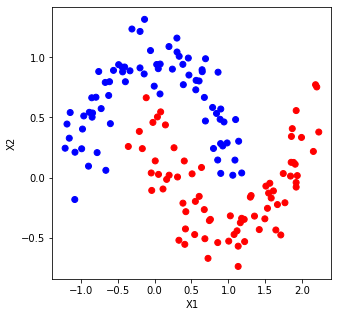

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=150, noise=0.15, random_state=42)

plt.figure(figsize=(5,5))
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

Observamos que las clases siguen una disposición de lunas (*moons*) por lo que su separación es no lineal. Utilizando la implementación [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) podemos observar los $k=5$ vecinos determinados por el algoritmos en diferentes regiones del espacio muestral:

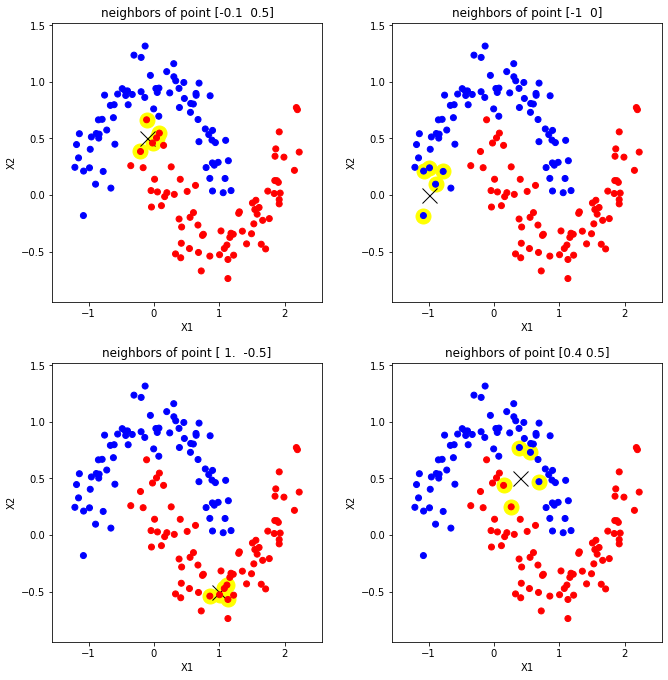

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

def plot_neighbors(X, y, axs, knn, point):
  min = np.amin(X, axis=0)
  max = np.amax(X, axis=0)

  diff = max - min

  min = min - 0.1 * diff
  max = max + 0.1 * diff

  axs.set_xlabel('X1')
  axs.set_ylabel('X2')

  axs.set_xlim(min[0], max[0])
  axs.set_ylim(min[1], max[1])

  axs.set_title('neighbors of point ' + str(point))

  axs.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr, zorder=20)

  axs.plot(point[0], point[1], c='black', marker='x', markersize=15, zorder=15)
  kneighbors = knn.kneighbors(np.expand_dims(point, 0), n_neighbors=knn.n_neighbors, return_distance=False)

  for i in kneighbors[0]:
    axs.plot(X[i,0], X[i,1], c='yellow', marker='o', markersize=15, zorder=10)

X, y = make_moons(n_samples=150, noise=0.15, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5).fit(X, y)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.tight_layout(pad=4.0)

plot_neighbors(X, y, axs[0,0], knn, np.array([-0.1, 0.5]))
plot_neighbors(X, y, axs[0,1], knn, np.array([-1, 0]))
plot_neighbors(X, y, axs[1,0], knn, np.array([1, -0.5]))
plot_neighbors(X, y, axs[1,1], knn, np.array([0.4, 0.5]))

Como vemos, el algoritmo encuentra siempre los *k* vecinos más cercanos. En algunos casos, la clasificación del nuevo punto será automática: si todos los vecinos pertenecen a la misma clase el nuevo punto pertenecerá a dicha clase; en otros, será necesario ponderar la clase media a la que pertenece el nuevo punto. Esto puede lograrse mediante una "votación" en la que cada vecino "opine" de la clase a la que debe pertenece el nuevo punto. Esta "votación" puede realizarse de forma uniforme (el peso de todos los vecinos es el mismo) o ponderada en función de la distancia del vecino al punto (el peso de los vecinos más cercanos es mayor).

Como podemos imaginar, el número vecinos es un híper-parámetro crucial para el desempeño de este clasificador. Es necesario ajustar adecuadamente este híper-parámetro ya que, si el híper-parámetro es demasiado pequeño tendremos *overfittig* y si el híper-parámetro es demasiado grande tendremos *underfitting*. 

Ilustremos este hecho con cuatro conjuntos de datos (*blobs*, *moons*, *circles* y *spirals*) y distinto número de vecinos (2, 10, 150):

<ipython-input-6-64eeae5cf888>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[idx+1].pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r, vmin=0, vmax=1)
<ipython-input-6-64eeae5cf888>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[idx+1].pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r, vmin=0, vmax=1)
<ipython-input-6-64eeae5cf888>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify 

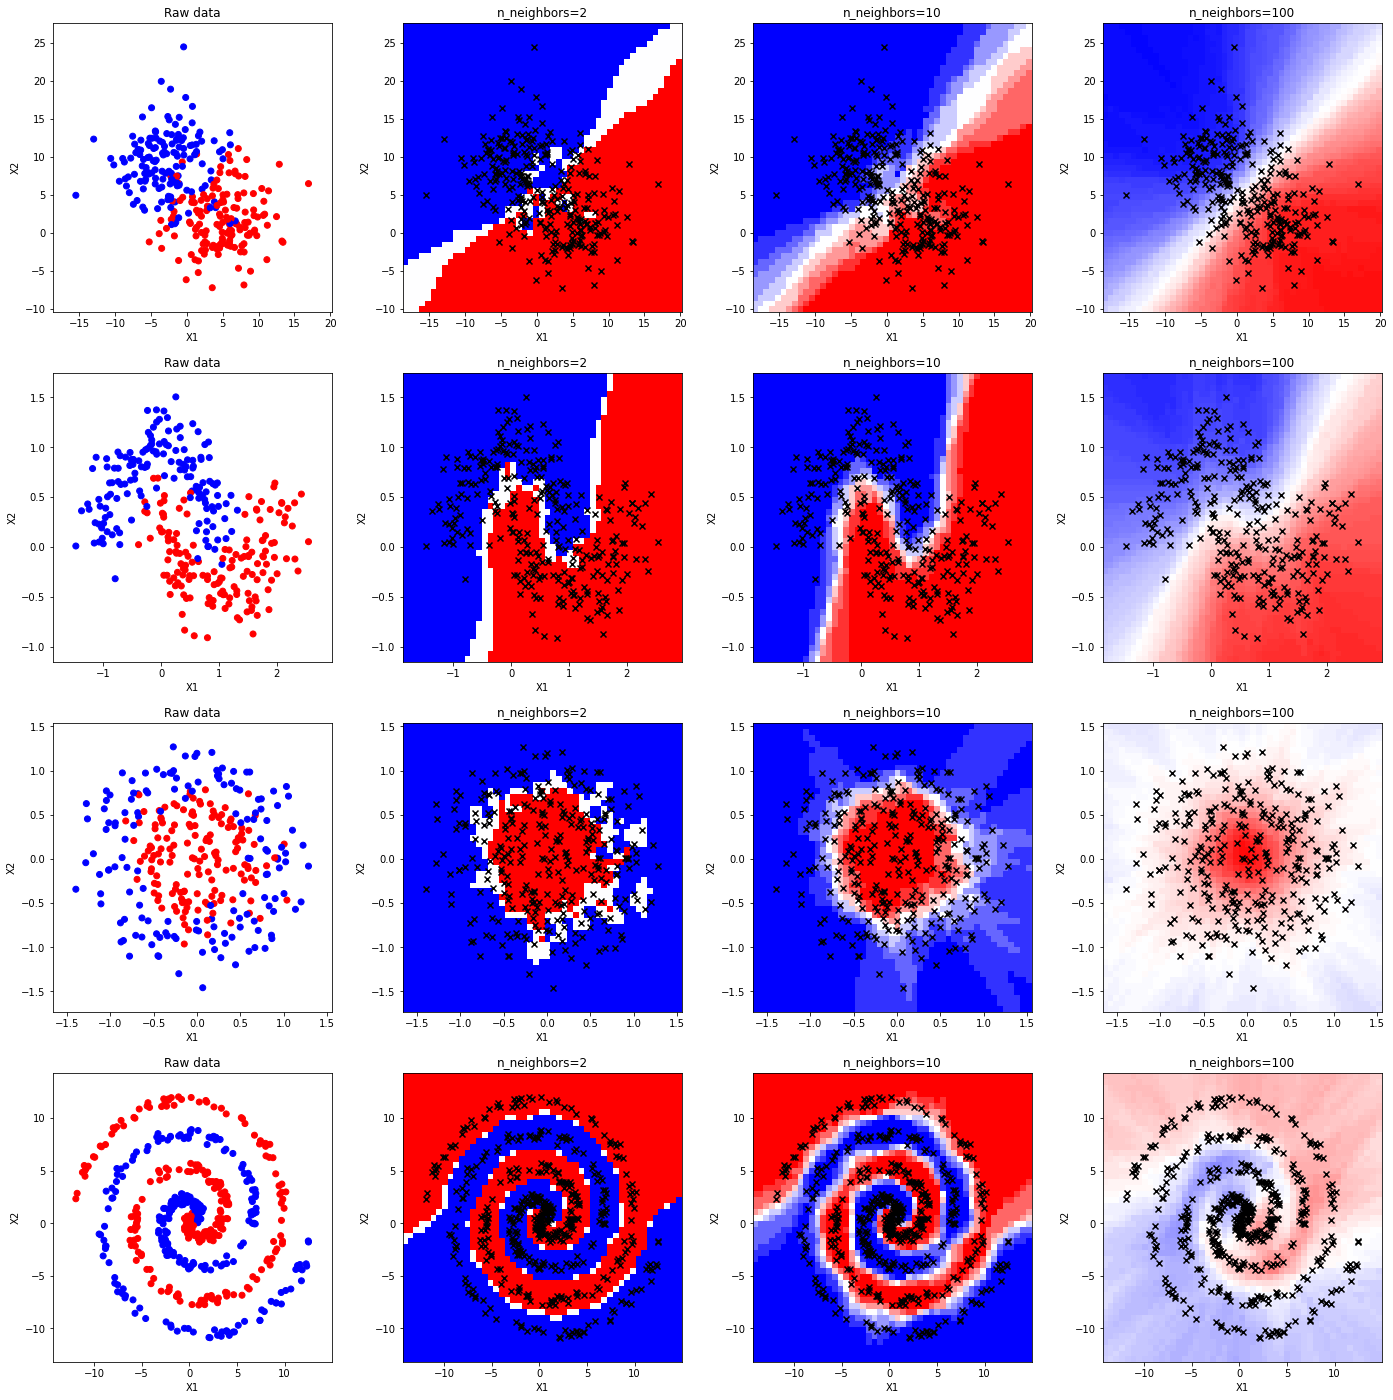

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs, make_moons, make_circles

def plot_clasification(X, y, axs):
  min = np.amin(X, axis=0)
  max = np.amax(X, axis=0)

  diff = max - min

  min = min - 0.1 * diff
  max = max + 0.1 * diff

  axs[0].set_title('Raw data')
  axs[0].set_xlabel('X1')
  axs[0].set_ylabel('X2')

  axs[0].set_xlim(min[0], max[0])
  axs[0].set_ylim(min[1], max[1])

  axs[0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

  for idx, n_neighbors in enumerate([2, 10, 100]):

    knn = KNeighborsClassifier(n_neighbors).fit(X, y)

    axs[idx+1].set_title('n_neighbors=' + str(n_neighbors))
    axs[idx+1].set_xlabel('X1')
    axs[idx+1].set_ylabel('X2')

    axs[idx+1].set_xlim(min[0], max[0])
    axs[idx+1].set_ylim(min[1], max[1])

    xx, yy = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
    Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
    Z = Z.reshape(xx.shape) 

    axs[idx+1].pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r, vmin=0, vmax=1)
    axs[idx+1].scatter(X[:,0], X[:,1], c='k', marker='x')


fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
fig.tight_layout(pad=4.0)

X, y = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=4.0, random_state=42)
plot_clasification(X, y, axs[0])

X, y = make_moons(n_samples=300, noise=0.20, random_state=42)
plot_clasification(X, y, axs[1])

X, y = make_circles(n_samples=300, noise=0.20, factor=0.5, random_state=42)
plot_clasification(X, y, axs[2])

X, y = make_spirals(n_samples=500, random_state=42)
plot_clasification(X, y, axs[3])



Una gran ventaja de *kNN*, además de su sencillez, es que permite la clasificación multiclase:

<ipython-input-7-eee46309f072>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(x1, x2, y_pred, cmap=plt.cm.Accent)
<ipython-input-7-eee46309f072>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(x1, x2, y_pred, cmap=plt.cm.Accent)
<ipython-input-7-eee46309f072>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilat

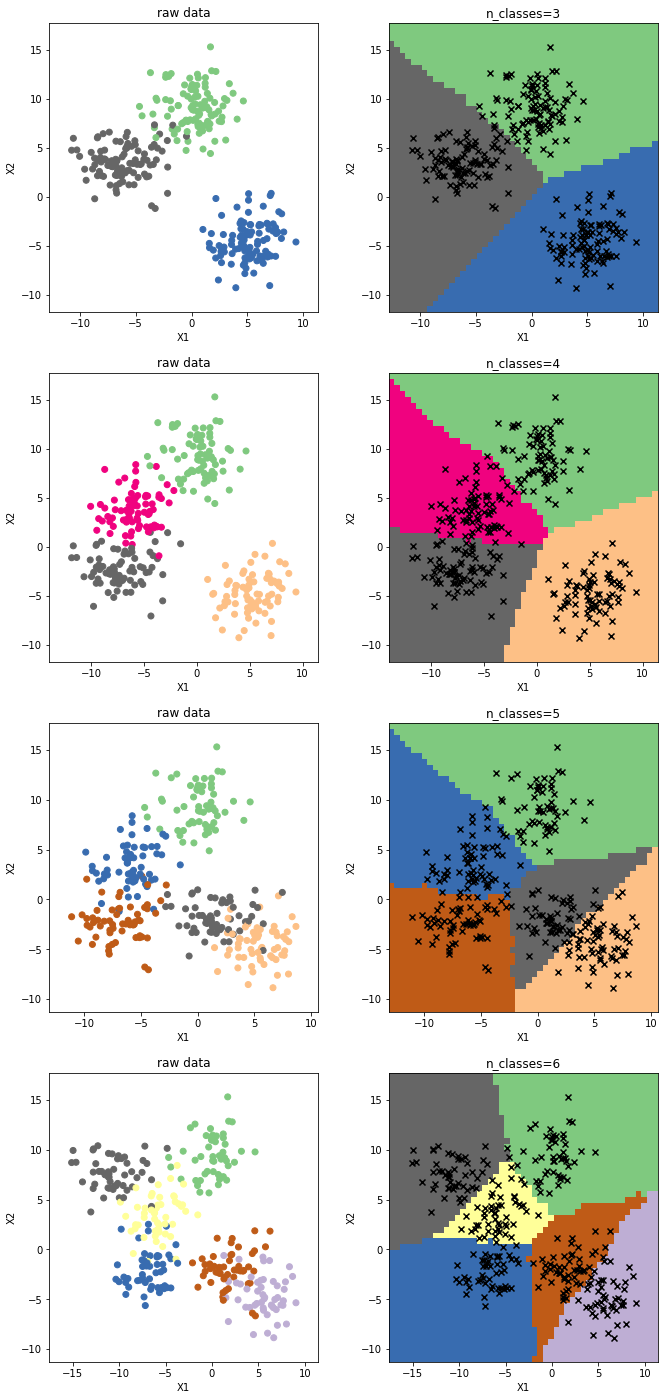

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs

def plot_clasification(n_classes, axs):
  X, y = make_blobs(n_samples=300, n_features=2, centers=n_classes, cluster_std=2.0, random_state=23)

  min = np.amin(X, axis=0)
  max = np.amax(X, axis=0)

  diff = max - min

  min = min - 0.1 * diff
  max = max + 0.1 * diff

  # raw data

  axs[0].set_title('raw data')
  axs[0].set_xlabel('X1')
  axs[0].set_ylabel('X2')

  axs[0].set_xlim(min[0], max[0])
  axs[0].set_ylim(min[1], max[1])

  axs[0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Accent)

  # classified data

  knn = KNeighborsClassifier(n_neighbors=20).fit(X, y)

  axs[1].set_title('n_classes=' + str(n_classes))
  axs[1].set_xlabel('X1')
  axs[1].set_ylabel('X2')

  axs[1].set_xlim(min[0], max[0])
  axs[1].set_ylim(min[1], max[1])

  x1, x2 = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
  y_pred = knn.predict(np.c_[x1.ravel(), x2.ravel()])
  y_pred = y_pred.reshape(x1.shape) 

  axs[1].pcolormesh(x1, x2, y_pred, cmap=plt.cm.Accent)
  axs[1].scatter(X[:,0], X[:,1], c='k', marker='x')


fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,20))
fig.tight_layout(pad=4.0)

plot_clasification(n_classes=3, axs=axs[0])
plot_clasification(n_classes=4, axs=axs[1])
plot_clasification(n_classes=5, axs=axs[2])
plot_clasification(n_classes=6, axs=axs[3])

<ipython-input-8-f28303a3cffe>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[1].pcolormesh(x1, x2, y_pred, cmap=plt.cm.Accent)
<ipython-input-8-f28303a3cffe>:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[2].pcolormesh(x1, x2, y_pred, cmap=plt.cm.Accent)
<ipython-input-8-f28303a3cffe>:79: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilat

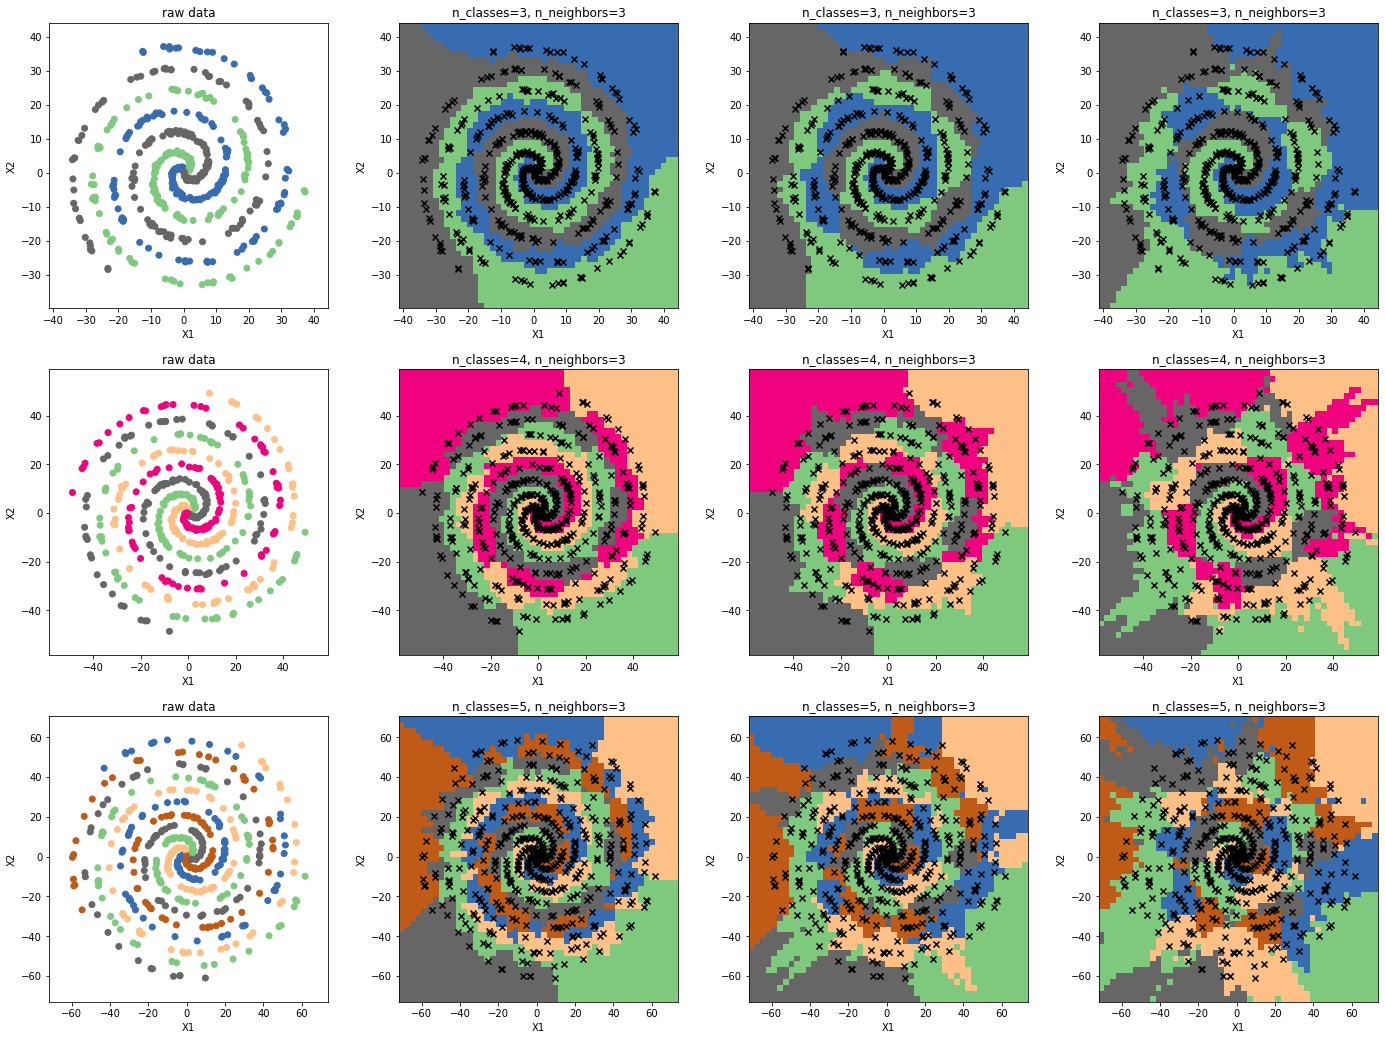

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs

def plot_clasification(n_classes, axs):
  X, y = make_spirals(n_samples=500, n_classes=n_classes, margin=1, random_state=42)

  min = np.amin(X, axis=0)
  max = np.amax(X, axis=0)

  diff = max - min

  min = min - 0.1 * diff
  max = max + 0.1 * diff

  x1, x2 = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))

  # raw data

  axs[0].set_title('raw data')
  axs[0].set_xlabel('X1')
  axs[0].set_ylabel('X2')

  axs[0].set_xlim(min[0], max[0])
  axs[0].set_ylim(min[1], max[1])

  axs[0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Accent)

  # n_neighbors=20

  knn = KNeighborsClassifier(n_neighbors=3).fit(X, y)

  axs[1].set_title('n_classes=' + str(n_classes) + ', n_neighbors=3')
  axs[1].set_xlabel('X1')
  axs[1].set_ylabel('X2')

  axs[1].set_xlim(min[0], max[0])
  axs[1].set_ylim(min[1], max[1])

  y_pred = knn.predict(np.c_[x1.ravel(), x2.ravel()])
  y_pred = y_pred.reshape(x1.shape) 

  axs[1].pcolormesh(x1, x2, y_pred, cmap=plt.cm.Accent)
  axs[1].scatter(X[:,0], X[:,1], c='k', marker='x')

  # n_neighbors=20

  knn = KNeighborsClassifier(n_neighbors=7).fit(X, y)

  axs[2].set_title('n_classes=' + str(n_classes) + ', n_neighbors=3')
  axs[2].set_xlabel('X1')
  axs[2].set_ylabel('X2')

  axs[2].set_xlim(min[0], max[0])
  axs[2].set_ylim(min[1], max[1])

  y_pred = knn.predict(np.c_[x1.ravel(), x2.ravel()])
  y_pred = y_pred.reshape(x1.shape) 

  axs[2].pcolormesh(x1, x2, y_pred, cmap=plt.cm.Accent)
  axs[2].scatter(X[:,0], X[:,1], c='k', marker='x')

  # n_neighbors=20

  knn = KNeighborsClassifier(n_neighbors=15).fit(X, y)

  axs[3].set_title('n_classes=' + str(n_classes) + ', n_neighbors=3')
  axs[3].set_xlabel('X1')
  axs[3].set_ylabel('X2')

  axs[3].set_xlim(min[0], max[0])
  axs[3].set_ylim(min[1], max[1])

  y_pred = knn.predict(np.c_[x1.ravel(), x2.ravel()])
  y_pred = y_pred.reshape(x1.shape) 

  axs[3].pcolormesh(x1, x2, y_pred, cmap=plt.cm.Accent)
  axs[3].scatter(X[:,0], X[:,1], c='k', marker='x')


fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20,15))
fig.tight_layout(pad=4.0)

plot_clasification(n_classes=3, axs=axs[0])
plot_clasification(n_classes=4, axs=axs[1])
plot_clasification(n_classes=5, axs=axs[2])

---

Creado por **Raúl Lara** (raul.lara@upm.es) y **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">